## Import Libraries

In [25]:
import kagglehub
import pandas as pd
import os


## Download Dataset from Kaggle

In [26]:
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
files = os.listdir(path)
print(files)
print("Path to dataset files:", path)

['WA_Fn-UseC_-HR-Employee-Attrition.csv']
Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


## Read DataSet

In [27]:
df = pd.read_csv(os.path.join(path, "WA_Fn-UseC_-HR-Employee-Attrition.csv"))

print(df.head())

print('Columns')
df.columns.to_list()

#print(df.info())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### **Part 1: Exploratory Data Analysis (EDA)**

#### 1. How many employees are there in the dataset? How many left the company?


In [28]:
total_employees = df.shape[0]
attrition_counts = df['Attrition'].value_counts()
print(f"Total number of employees: {total_employees}")
print("Attrition counts:")
print(attrition_counts)

Total number of employees: 1470
Attrition counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


#### 2. What is the average age of employees who left vs. stayed?

In [29]:
average_age_by_attrition = df.groupby('Attrition')['Age'].mean()
print("Average age by attrition:")
print(average_age_by_attrition)

Average age by attrition:
Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


#### 3. What is the attrition rate across departments?

In [30]:
attrition_rate_by_department = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x))
print("Attrition rate across departments:")
print(attrition_rate_by_department)

Attrition rate across departments:
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64


#### 4. Is there any correlation between distance from home and attrition?

In [31]:
# We can look at the average distance from home for those who left vs stayed
average_distance_by_attrition = df.groupby('Attrition')['DistanceFromHome'].mean()
print("Average distance from home by attrition:")
print(average_distance_by_attrition)

# We can also calculate the correlation coefficient (requires converting Attrition to numeric)
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_distance_attrition = df['DistanceFromHome'].corr(df['Attrition_numeric'])
print(f"Correlation between DistanceFromHome and Attrition: {correlation_distance_attrition}")
df = df.drop('Attrition_numeric', axis=1) # Drop the temporary column

Average distance from home by attrition:
Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64
Correlation between DistanceFromHome and Attrition: 0.07792358295570351


#### 5. What is the relationship between overtime and attrition?

In [32]:
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
print("Relationship between OverTime and Attrition:")
print(overtime_attrition)

Relationship between OverTime and Attrition:
Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


#### 6. How does monthly income impact attrition?

In [33]:
# We can look at the average monthly income for those who left vs stayed
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()
print("Average Monthly Income by attrition:")
print(average_income_by_attrition)

# We can also create income bins and see attrition rate in each bin
df['MonthlyIncome_bins'] = pd.qcut(df['MonthlyIncome'], q=5, labels=False, duplicates='drop')
attrition_rate_by_income_bin = df.groupby('MonthlyIncome_bins')['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x))
print("\nAttrition rate by Monthly Income bin:")
print(attrition_rate_by_income_bin)
df = df.drop('MonthlyIncome_bins', axis=1)

Average Monthly Income by attrition:
Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

Attrition rate by Monthly Income bin:
MonthlyIncome_bins
0    0.312925
1    0.170068
2    0.105442
3    0.125850
4    0.091837
Name: Attrition, dtype: float64


#### 7. Which features have the most missing values (if any)?

In [34]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per feature:")
print(missing_values[missing_values > 0])


Missing values per feature:
Series([], dtype: int64)


### **Part 2: Visualizations**

### Import Libraries

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

#### 1. Bar chart: Count of employees by Attrition.

/tmp/ipython-input-36-2446424721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='viridis')


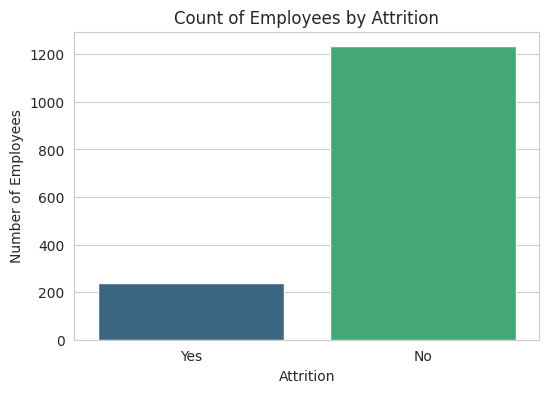

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='viridis')
plt.title('Count of Employees by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

#### 2. Boxplot: MonthlyIncome vs Attrition.

/tmp/ipython-input-37-290296838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')


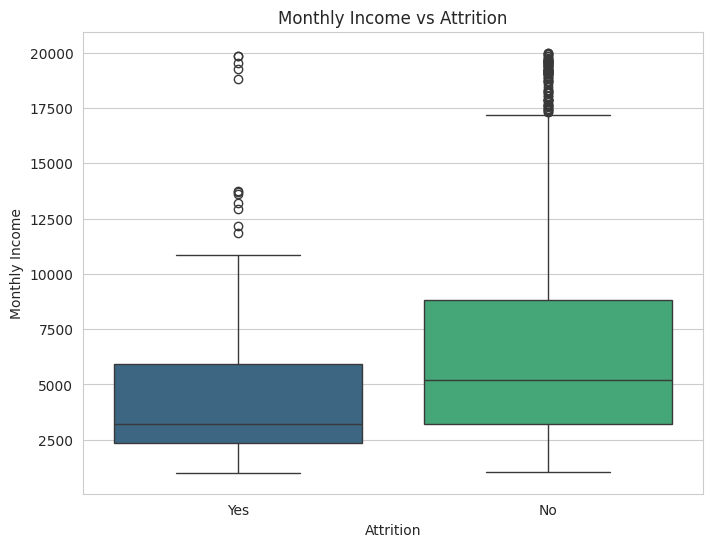

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

#### 3. Histogram: Age distribution by Attrition.

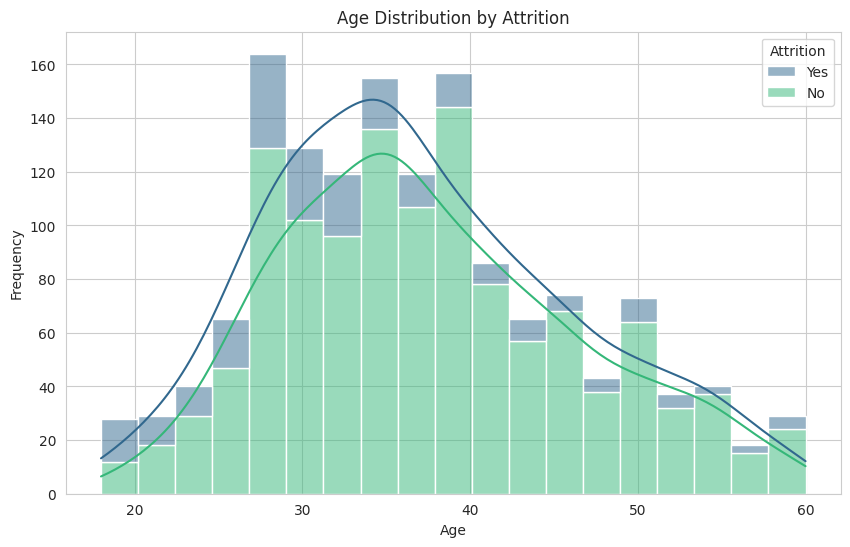

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True, palette='viridis')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 4. Stacked bar chart: Department vs Attrition.

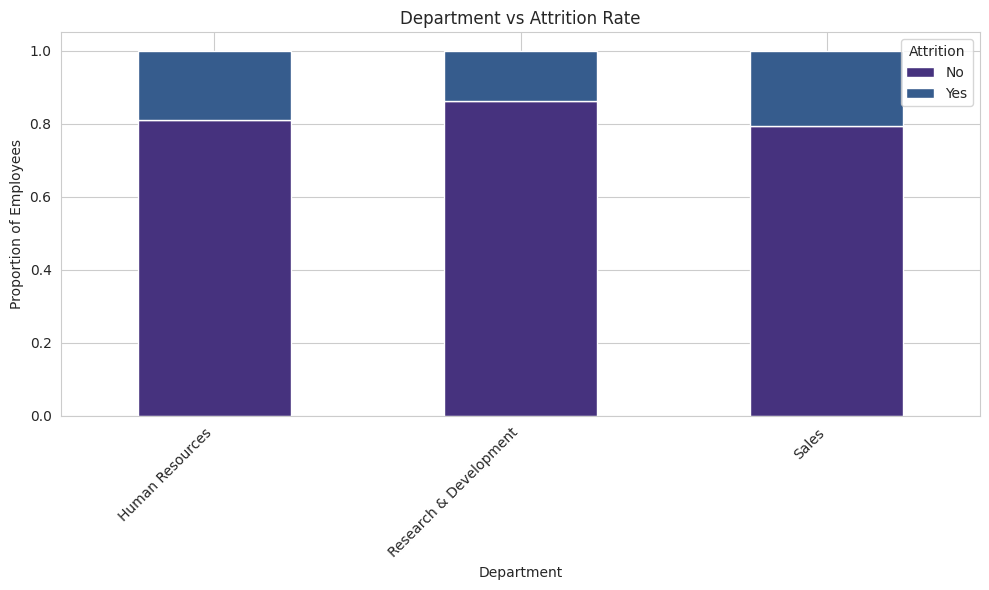

In [39]:
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
attrition_by_department = attrition_by_department.apply(lambda x: x / x.sum(), axis=1)

ax = attrition_by_department.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('viridis'))
plt.title('Department vs Attrition Rate')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#### 5. Countplot: JobSatisfaction by Attrition.

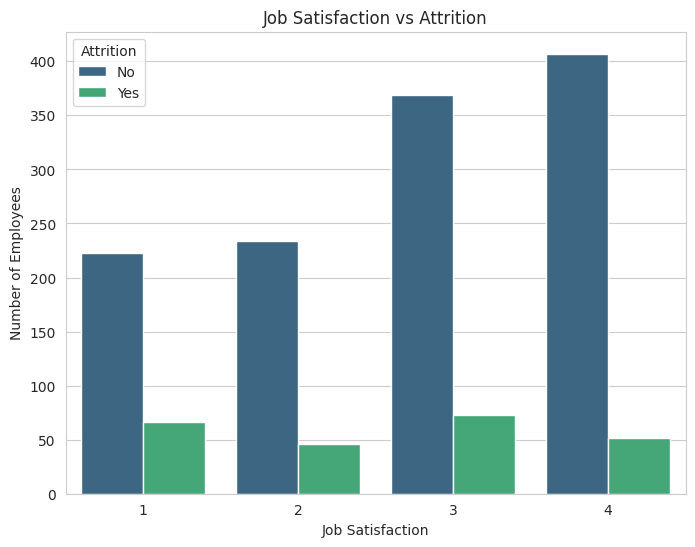

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='viridis')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')
plt.show()

#### 6. Heatmap: Correlation between numerical variables.

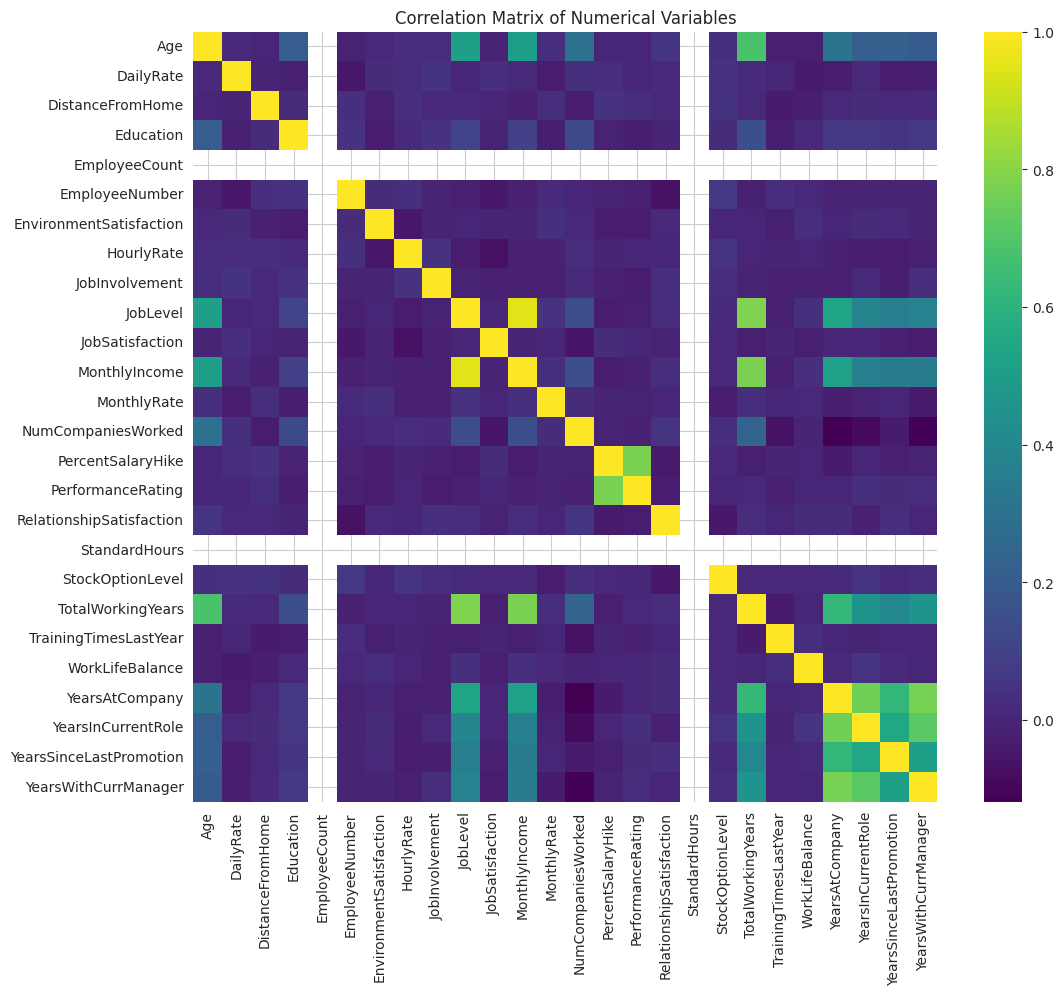

In [41]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### **Part 3: Machine Learning Model Training**

#### Step 1: Encode categorical variables

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Shape of training data (X_train, y_train): (1176, 45) (1176,)
Shape of testing data (X_test, y_test): (294, 45) (294,)

--- Logistic Regression Evaluation ---
Accuracy: 0.8775510204081632

Confusion Matrix:
 [[245   2]
 [ 34  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.87      0.28      0.42        47

    accuracy                           0.88       294
   macro avg       0.87      0.63      0.68       294
weighted avg       0.88      0.88      0.85       294


--- Random Forest Classifier Evaluation ---
Accuracy: 0.8367346938775511

Confusion Matrix:
 [[242   5]
 [ 43   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0

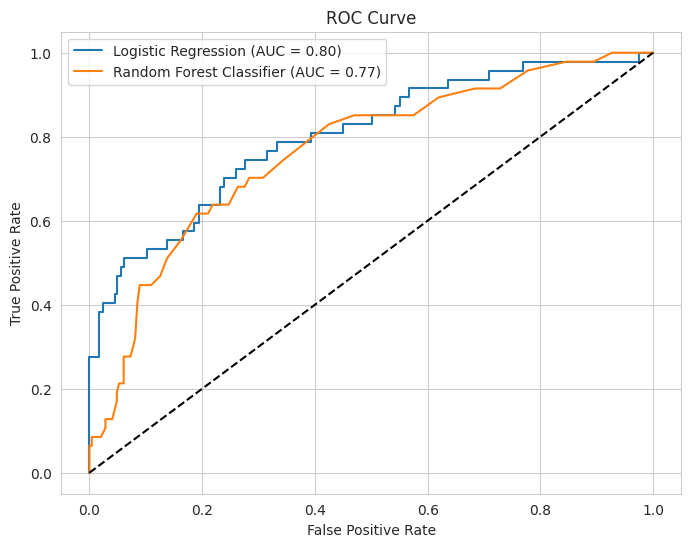

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import numpy as np

# Step 1: Encode categorical variables
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(f"Categorical columns: {list(categorical_cols)}")

# Apply Label Encoding for binary variables
for col in ['Attrition', 'OverTime', 'Gender']:
    if col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        categorical_cols = categorical_cols.drop(col) # Remove from list for OneHotEncoding

# Apply One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop EmployeeCount and StandardHours as they have only one unique value
# Drop 'Over18' only if it exists in the columns
cols_to_drop = ['EmployeeCount', 'StandardHours']
if 'Over18' in df.columns:
    cols_to_drop.append('Over18')

df = df.drop(cols_to_drop, axis=1)


# Step 2: Prepare features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 3: Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)

# Step 4: Train at least two classification models

# Model 1: Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Step 5: Evaluate using Accuracy, Confusion Matrix, Classification Report, ROC Curve

print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# ROC Curve for Logistic Regression
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

print("\n--- Random Forest Classifier Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_clf))

# ROC Curve for Random Forest Classifier
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf_clf, tpr_rf_clf, thresholds_rf_clf = roc_curve(y_test, y_prob_rf_clf)
auc_rf_clf = roc_auc_score(y_test, y_prob_rf_clf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf_clf, tpr_rf_clf, label=f'Random Forest Classifier (AUC = {auc_rf_clf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Step 2: Prepare features (X) and target (y)

In [43]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

#### Step 3: Train/Test Split (80/20)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)

Shape of training data (X_train, y_train): (1176, 45) (1176,)
Shape of testing data (X_test, y_test): (294, 45) (294,)


#### Step 4: Train at least two classification models
- Model 1: Logistic Regression

In [45]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

- Model 2: Random Forest Classifier

In [46]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

#### Step 5: Evaluate using Accuracy, Confusion Matrix, Classification Report, ROC Curve


In [47]:
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Evaluation
Accuracy: 0.8775510204081632
Confusion Matrix:
 [[245   2]
 [ 34  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.87      0.28      0.42        47

    accuracy                           0.88       294
   macro avg       0.87      0.63      0.68       294
weighted avg       0.88      0.88      0.85       294



- ROC Curve for Logistic Regression

In [48]:
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

print("Random Forest Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf_clf))
print("Classification Report:", classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Evaluation
Accuracy: 0.8367346938775511
Confusion Matrix: [[242   5]
 [ 43   4]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



- ROC Curve for Random Forest Classifier

In [49]:
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf_clf, tpr_rf_clf, thresholds_rf_clf = roc_curve(y_test, y_prob_rf_clf)
auc_rf_clf = roc_auc_score(y_test, y_prob_rf_clf)

- Plot ROC curves

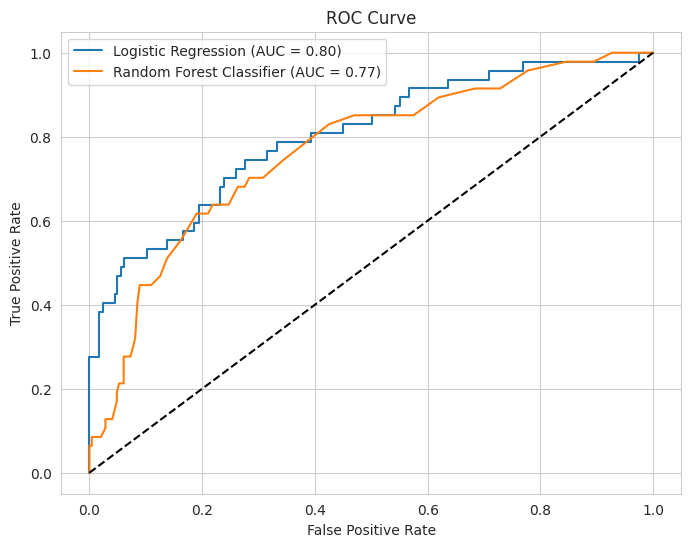

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf_clf, tpr_rf_clf, label=f'Random Forest Classifier (AUC = {auc_rf_clf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Happy Coding 🙂